### 1. Using py-GDAL/OGR

In [1]:
import os
from osgeo import ogr
daShapefile = "../data/FW_SHRIMP/FW_SHRIMPS.shp"

In [2]:
driver = ogr.GetDriverByName('ESRI Shapefile')

In [3]:
dataSource = driver.Open(daShapefile, 0) # 0 means read-only. 1 means writeable.

In [4]:
# Warning: prints a lot of points
layer = dataSource.GetLayer()
featureCount = layer.GetFeatureCount()
for feature in layer:
    geom = feature.GetGeometryRef()
    print(geom.Centroid().ExportToWkt())

POINT (24.595046691894176 -1.924423653224926)
POINT (127.908131559974407 26.572772893063011)
POINT (51.868779909514899 -1.381283576802766)
POINT (78.971131424698783 10.767284990772433)
POINT (43.763865610039474 -9.167971837418698)
POINT (85.374360183587228 19.720288401313706)
POINT (109.220140575879896 27.726276932336045)
POINT (103.698690281043568 2.004319984094406)
POINT (77.380915767499303 8.383299845630935)
POINT (109.128744997176838 0.632907251139968)
POINT (101.513267153881927 7.043133052525765)
POINT (111.451311757316006 2.159298200241736)
POINT (114.0890886333559 27.507021862879906)
POINT (29.903792515206639 -1.292167883837752)
POINT (117.996262609445282 5.455255486779808)
POINT (100.983750333945508 22.794539761469984)
POINT (101.545921880848354 18.655981784631816)
POINT (101.212530419255074 16.833699200040527)
POINT (98.352909336563499 18.73441407405662)
POINT (20.526065990164287 -7.544663596936977)
POINT (120.349661580648956 -5.481937970715197)
POINT (109.590638467848194 28.1

In [5]:
from shapely.geometry import Point

In [6]:
import numpy as np
xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000
xc = (xmax - xmin) * np.random.random(2000) + xmin
yc = (ymax - ymin) * np.random.random(2000) + ymin

In [7]:
import geopandas as gpd
pts = gpd.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

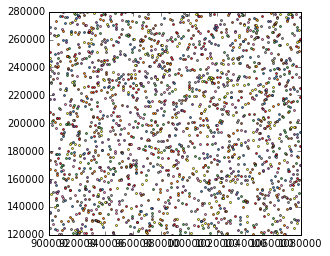

In [9]:
%matplotlib inline
pts.plot()

In [10]:
type(pts)

geopandas.geoseries.GeoSeries

In [11]:
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from numpy import array, arange
import matplotlib

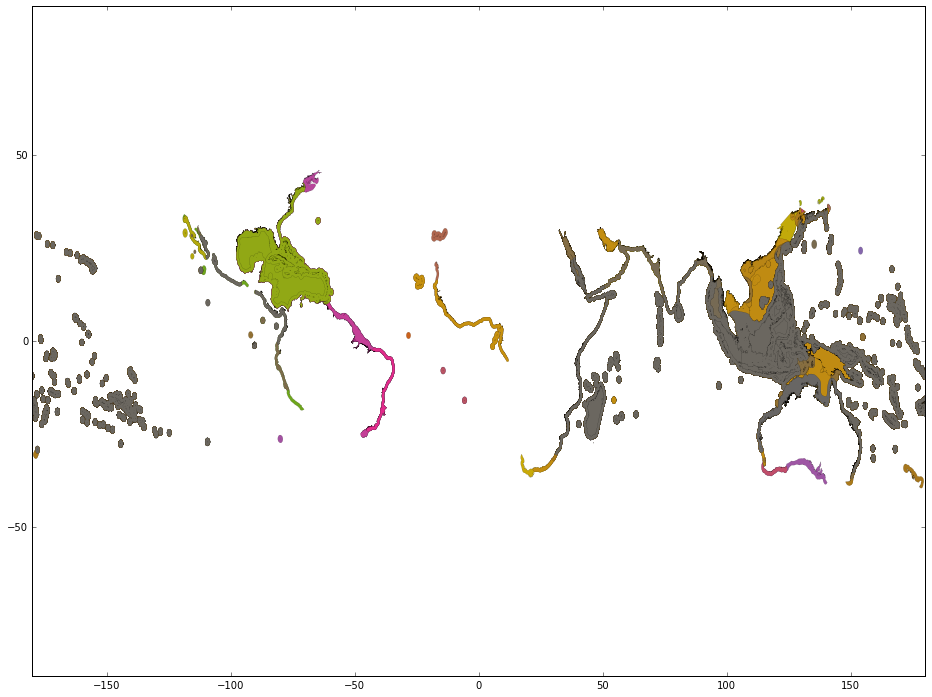

In [15]:
sf = shapefile.Reader("../data/BUTTERFLYFISH/BUTTERFLYFISH.shp")
recs    = sf.records()
shapes  = sf.shapes()
Nshp    = len(shapes)
cns     = []
for nshp in range(Nshp):
    cns.append(recs[nshp][1])
cns = array(cns)
cm    = matplotlib.cm.get_cmap('Dark2')
cccol = cm(1.*arange(Nshp)/Nshp)
#   -- plot --
fig     = plt.figure(figsize=(16,12))
ax      = fig.add_subplot(111)
for nshp in range(Nshp):
    ptchs   = []
    pts     = array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
    for pij in range(len(prt)):
     ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
    ax.add_collection(PatchCollection(ptchs,facecolor=cccol[nshp,:],edgecolor='k', linewidths=.1))
ax.set_xlim(-180,+180)
ax.set_ylim(-90,90)
#fig.savefig('test1.png')

### 2. Using geopandas

In [1]:
from geopandas import GeoSeries, GeoDataFrame
from geopandas.geoseries import *
p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = GeoSeries([p1, p2, p3])

In [34]:
g

0         POLYGON ((0 0, 1 0, 1 1, 0 0))
1    POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))
2    POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))
dtype: object

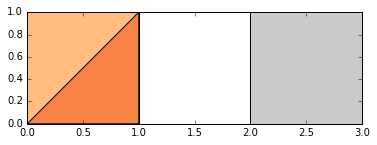

In [35]:
g.plot()

In [36]:
g.area

0    0.5
1    1.0
2    1.0
dtype: float64

In [2]:
turtles = GeoDataFrame.from_file('../data/FW_TURTLES/FW_TURTLES.shp')

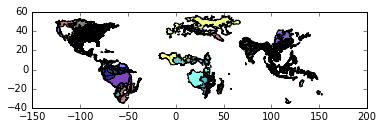

In [44]:
turtles.plot()

In [3]:
turtles.head()

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_Area,shape_Leng,source,species_na,subpop,subspecies,tax_comm,year
0,Batagur baska,CR,CRF,REPTILIA,Rhodin,None,GEOEMYDIDAE,Batagur,(POLYGON ((88.17095947265625 21.91680908203125...,2614.0,...,1.0,1.0,11.002731,126.804751,CBFTT,baska,None,None,None,2013.0
1,Cuora galbinifrons,CR,CRF,REPTILIA,Rhodin,None,GEOEMYDIDAE,Cuora,"(POLYGON ((105.4661254882812 21.1263427734375,...",5955.0,...,1.0,1.0,16.619326,52.207722,CBFTT,galbinifrons,None,None,None,2013.0
2,Graptemys pseudogeographica,LC,CRF,REPTILIA,Rhodin,None,EMYDIDAE,Graptemys,"(POLYGON ((-95.635009765625 35.36834716796875,...",165600.0,...,1.0,1.0,97.575806,256.031805,CBFTT,pseudogeographica,None,None,None,2013.0
3,Malaclemys terrapin,LR/nt,CRF,REPTILIA,Rhodin,None,EMYDIDAE,Malaclemys,"(POLYGON ((-76.6082763671875 39.25, -76.615722...",12695.0,...,1.0,1.0,11.345627,347.909301,CBFTT,terrapin,None,None,None,2013.0
4,Melanochelys trijuga,LR/nt,CRF,REPTILIA,Rhodin,None,GEOEMYDIDAE,Melanochelys,(POLYGON ((84.14166259765625 26.06658935546875...,13039.0,...,1.0,1.0,172.597842,326.610136,CBFTT,trijuga,None,None,None,2013.0


In [4]:
turtles.shape

(181, 26)

In [5]:
turtles.columns

Index(['binomial', 'category', 'citation', 'class_name', 'compiler',
       'dist_comm', 'family_nam', 'genus_name', 'geometry', 'id_no', 'island',
       'kingdom_na', 'legend', 'order_name', 'origin', 'phylum_nam',
       'presence', 'seasonal', 'shape_Area', 'shape_Leng', 'source',
       'species_na', 'subpop', 'subspecies', 'tax_comm', 'year'],
      dtype='object')

In [7]:
turtles['presence'].unique() # hmm not all records of presence are with 1 / 0

array([ 1.,  5.])

In [14]:
turtles['compiler'].unique()

array(['Rhodin'], dtype=object)

In [121]:
turtles['id_no'].head() # could use this as a species ID

0      2614.0
1      5955.0
2    165600.0
3     12695.0
4     13039.0
Name: id_no, dtype: float64

Let's work with this dataset:

http://maps.iucnredlist.org/map.html?id=75
http://www.iucnredlist.org/details/75/0

In [52]:
subset_turtles = turtles[turtles['binomial']=='Acanthochelys pallidipectoris']

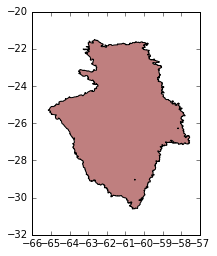

In [53]:
subset_turtles.plot() # yep, matches the map http://maps.iucnredlist.org/map.html?id=75

In [57]:
subset_turtles['geometry'].convex_hull

138    POLYGON ((-60.62493896484375 -30.6082763671875...
dtype: object

In [58]:
subset_turtles.geometry.area

138    36.632842
dtype: float64

In [76]:
type(subset_turtles.geometry)

geopandas.geoseries.GeoSeries

In [83]:
import shapely

In [87]:
for poly in subset_turtles.geometry:
    print(poly)

POLYGON ((-59.20001220703125 -28.0374755859375, -59.2041015625 -28.0374755859375, -59.20538330078125 -28.0413818359375, -59.21868896484375 -28.05352783203125, -59.222900390625 -28.0548095703125, -59.2288818359375 -28.05889892578125, -59.2396240234375 -28.0576171875, -59.24371337890625 -28.0548095703125, -59.24798583984375 -28.05352783203125, -59.2537841796875 -28.04925537109375, -59.25628662109375 -28.05059814453125, -59.27423095703125 -28.06732177734375, -59.27960205078125 -28.06488037109375, -59.28265380859375 -28.06048583984375, -59.28399658203125 -28.05206298828125, -59.286865234375 -28.0479736328125, -59.28875732421875 -28.04168701171875, -59.29547119140625 -28.0465087890625, -59.30206298828125 -28.045166015625, -59.30615234375 -28.04229736328125, -59.31170654296875 -28.04052734375, -59.31329345703125 -28.02520751953125, -59.31866455078125 -28.02142333984375, -59.3228759765625 -28.0201416015625, -59.32708740234375 -28.0172119140625, -59.33123779296875 -28.0201416015625, -59.349304

In [105]:
subset_turtles.geometry.centroid

138    POINT (-61.18988316789672 -25.82077392224204)
dtype: object

In [155]:
turtles.geometry.bounds.head() # useful!!!!

,minx,miny,maxx,maxy
0,85.750061,15.166748,98.171570,24.050598
1,103.295776,17.520447,110.420898,23.842285
2,-101.454102,28.924927,-82.429138,46.795898
3,-97.575012,24.520813,-69.924377,42.083923
4,72.578674,4.969604,99.421509,30.907959


In [152]:
subset_turtles.geometry.bounds.maxx.iloc[0]

-57.53692626953125

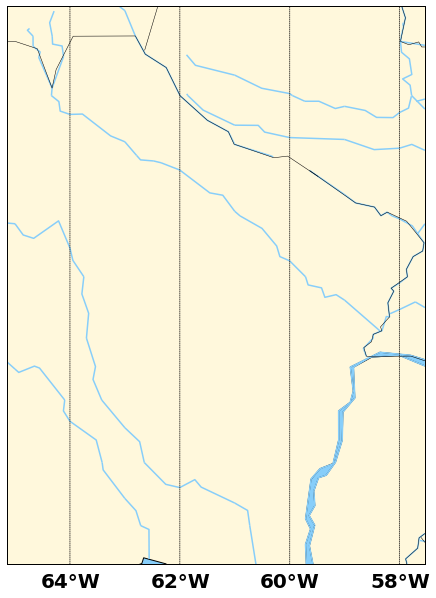

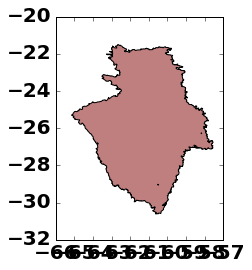

In [206]:
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
import numpy as np
from descartes import PolygonPatch

water = 'lightskyblue'
earth = 'cornsilk'
font = {'family' : 'Calibri',
        'weight': 'bold',
        'size'   : 20}
mpl.rc('font', **font)

fig, ax1 = plt.subplots(figsize=(12, 10))
mm = Basemap(projection='merc', lat_0=50, lon_0=-100,
                        resolution='l', area_thresh=1000.0, 
                        llcrnrlon=subset_turtles.geometry.bounds.minx.iloc[0],# lower left corner longitude point 
                        llcrnrlat=subset_turtles.geometry.bounds.miny.iloc[0], # lower left corner latitude point
                        urcrnrlon=subset_turtles.geometry.bounds.maxx.iloc[0], # upper right longitude point
                        urcrnrlat=subset_turtles.geometry.bounds.maxy.iloc[0] # upper right latitude point
                        )
coast = mm.drawcoastlines()
rivers = mm.drawrivers(color=water, linewidth=1.5)
continents = mm.fillcontinents(        
    color=earth,
    lake_color=water)
countries = mm.drawcountries()
bound= mm.drawmapboundary(fill_color=water)
merid = mm.drawmeridians(np.arange(-180, 180, 2), labels=[False, False, False, True])
parall = mm.drawparallels(np.arange(0, 80), labels=[True, True, False, False])

subset_turtles.plot()

In [171]:
polygon = subset_turtles.geometry.get_values()[0]

In [172]:
type(polygon)

shapely.geometry.polygon.Polygon

In [188]:
type(subset_turtles)

geopandas.geodataframe.GeoDataFrame

In [207]:
matplotlib.patches.Polygon # shapely.geometry.polygon.Polygon ? 

matplotlib.patches.Polygon

In [221]:
subset_turtles['id_no'].shape[0]

1

In [226]:
subset_turt

(0, 26)